# Finding Feasible Counterfactual Explanations (FCX)

Feasible Counterfactual Explanations (FCX) is a novel framework that generates realistic and low-cost counterfactuals by enforcing both hard feasibility constraints provided by domain experts and soft causal constraints inferred from data. Built on a modified Variational Autoencoder and optimized with a multi-factor loss function, FCX produces sparse, diverse, and actionable counterfactuals while preserving causal relationships, offering both individual-level explanations and global model feasibility assessments across multiple datasets.

### Law school Dataset Example

This notebook demonstrates preparation, training, and evaluation of the FCX models  
specifically for the **Law school** dataset.  
We will:
1. Unpack the preprocessed data  
2. (Optional) Fine‑tune the black‑box model  
3. Train the unary and binary counterfactual generators  
4. Evaluate the trained generators  

In [ ]:
# Unzip the Adult dataset archive
#!7z x data.7z -o ./data

Load paths

In [1]:
import sys, os
import importlib.util
exp_dir = os.path.abspath(os.path.join('..','..','humancompatible','explain'))
sys.path.insert(0, exp_dir)

fcx_dir = os.path.abspath(os.path.join('..','..','humancompatible','explain','fcx'))
sys.path.insert(0, fcx_dir)

# compute absolute path to the `scripts` folder
scripts_dir = os.path.abspath(
    os.path.join('..', '..', 'humancompatible', 'explain', 'fcx', 'scripts')
)
sys.path.append(scripts_dir)
# 1) Compute the full path to your script
script_path = os.path.abspath(
    os.path.join('..','..','humancompatible','explain','fcx','scripts','blackbox-model-train.py')
)
# 2) Create a module spec and module object
spec = importlib.util.spec_from_file_location("blackbox_model_train", script_path)
bb_mod = importlib.util.module_from_spec(spec)

# 3) Execute the module in its own namespace
spec.loader.exec_module(bb_mod)

# 4) Extract the function
train_blackbox = bb_mod.train_blackbox

## 1. (Optional) Fine‑tune the black‑box model for Law school

Run this first if the provided checkpoint isn’t compatible.

In [2]:


# Fine-tune/load the black‑box model
train_blackbox('law')

   lsat  decile1b  decile3  ugpa  zfygpa  zgpa fulltime male fam_inc tier  \
0  44.0        10       10   3.5    1.33  1.88        1    0       5    4   
1  29.0         5        4   3.5   -0.11 -0.57        1    0       4    2   
2  36.0         3        2   3.5   -0.64 -1.12        1    1       1    3   
3  39.0         7        4   3.5    0.34 -0.49        1    1       4    3   
4  48.0         9        8   3.5    1.02  0.76        1    1       4    5   

   pass_bar  
0         1  
1         1  
2         1  
3         1  
4         1  
   lsat  decile1b  decile3  ugpa  zfygpa  zgpa fulltime male fam_inc tier  \
0  44.0        10       10   3.5    1.33  1.88        1    0       5    4   
1  29.0         5        4   3.5   -0.11 -0.57        1    0       4    2   
2  36.0         3        2   3.5   -0.64 -1.12        1    1       1    3   
3  39.0         7        4   3.5    0.34 -0.49        1    1       4    3   
4  48.0         9        8   3.5    1.02  0.76        1    1       4

BlackBox(
  (predict_net): Sequential(
    (0): Linear(in_features=21, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=2, bias=True)
  )
)

## 2. Train FCX on the Law school dataset

Next, we train the **unary** generator, then the **binary** generator.

In [ ]:

from FCX_binary_generation_law import train_binary_fcx_vae
#!pip install networkx==2.8
# Call it for the Adult dataset
train_binary_fcx_vae(
    'law',
    base_data_dir='../../data/',
    base_model_dir='../models/',
    batch_size=2048, #2048
    epochs=25, #50
    validity=76.0,
    feasibility=87.0,
    margin=0.344
)

{15: 6, 16: 5, 17: 4, 18: 3, 19: 2, 20: 1}
   lsat  decile1b  decile3  ugpa  zfygpa  zgpa fulltime male fam_inc tier  \
0  44.0        10       10   3.5    1.33  1.88        1    0       5    4   
1  29.0         5        4   3.5   -0.11 -0.57        1    0       4    2   
2  36.0         3        2   3.5   -0.64 -1.12        1    1       1    3   
3  39.0         7        4   3.5    0.34 -0.49        1    1       4    3   
4  48.0         9        8   3.5    1.02  0.76        1    1       4    5   

   pass_bar  
0         1  
1         1  
2         1  
3         1  
4         1  
   lsat  decile1b  decile3  ugpa  zfygpa  zgpa fulltime male fam_inc tier  \
0  44.0        10       10   3.5    1.33  1.88        1    0       5    4   
1  29.0         5        4   3.5   -0.11 -0.57        1    0       4    2   
2  36.0         3        2   3.5   -0.64 -1.12        1    1       1    3   
3  39.0         7        4   3.5    0.34 -0.49        1    1       4    3   
4  48.0         9        

## 3. Evaluate the trained models (Law school)

Run evaluation scripts to compute validity and feasibility metrics.

{13: 6, 14: 5, 15: 4, 16: 3, 17: 2, 18: 1}
   lsat  decile1b  decile3  ugpa  zfygpa  zgpa fulltime male fam_inc tier  \
0  44.0        10       10   3.5    1.33  1.88        1    0       5    4   
1  29.0         5        4   3.5   -0.11 -0.57        1    0       4    2   
2  36.0         3        2   3.5   -0.64 -1.12        1    1       1    3   
3  39.0         7        4   3.5    0.34 -0.49        1    1       4    3   
4  48.0         9        8   3.5    1.02  0.76        1    1       4    5   

   pass_bar  
0         1  
1         1  
2         1  
3         1  
4         1  
   lsat  decile1b  decile3  ugpa  zfygpa  zgpa fulltime male fam_inc tier  \
0  44.0        10       10   3.5    1.33  1.88        1    0       5    4   
1  29.0         5        4   3.5   -0.11 -0.57        1    0       4    2   
2  36.0         3        2   3.5   -0.64 -1.12        1    1       1    3   
3  39.0         7        4   3.5    0.34 -0.49        1    1       4    3   
4  48.0         9        

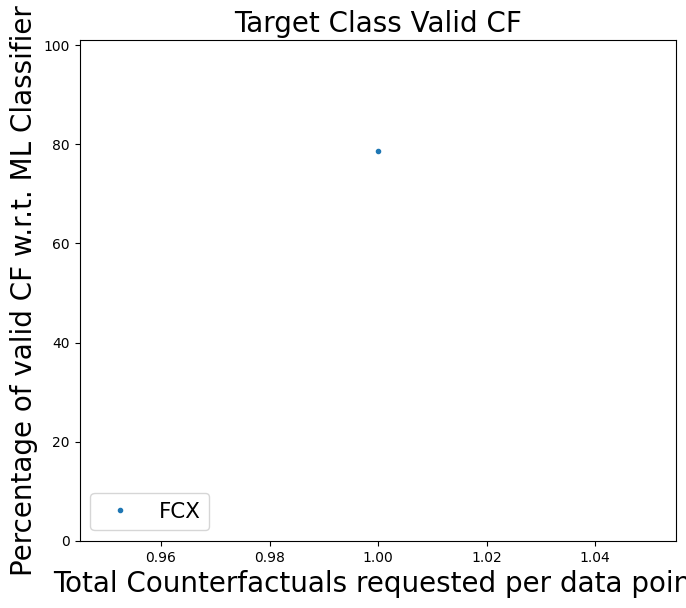

[78.66666667]
Mean Age-Ed Constraint Score:  72.72727272727273 27.272727272727273 0.7272727272727273
Count:  8 0 3 11
Pos Count:  8 0 0
Mean Age-Ed Constraint Score:  75.0 25.0 0.75
Count:  6 0 2 8
Pos Count:  6 0 0
Mean Age-Ed Constraint Score:  69.23076923076923 30.76923076923077 0.6923076923076923
Count:  9 0 4 13
Pos Count:  9 0 0
Mean Age-Ed Constraint Score:  77.77777777777777 22.22222222222222 0.7777777777777777
Count:  7 0 2 9
Pos Count:  7 0 0
Mean Age-Ed Constraint Score:  70.0 30.0 0.7
Count:  7 0 3 10
Pos Count:  7 0 0
Mean Age-Ed Constraint Score:  69.23076923076923 30.76923076923077 0.6923076923076923
Count:  9 0 4 13
Pos Count:  9 0 0
Mean Age-Ed Constraint Score:  66.66666666666667 33.333333333333336 0.6666666666666667
Count:  8 0 4 12
Pos Count:  8 0 0
Mean Age-Ed Constraint Score:  81.81818181818181 18.181818181818183 0.8181818181818181
Count:  9 0 2 11
Pos Count:  9 0 0
Mean Age-Ed Constraint Score:  66.66666666666667 33.333333333333336 0.6666666666666667
Count:  8 0

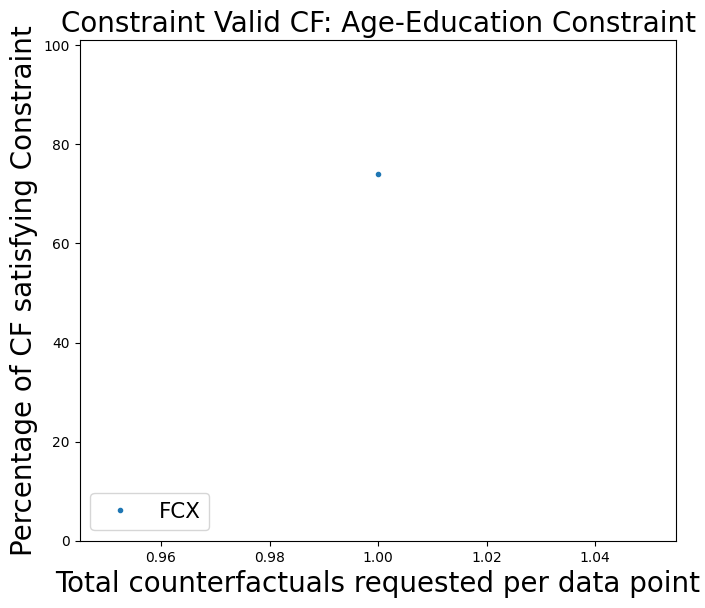

[74.0027195]
Mean Proximity Score:  -13.574021356012308
Mean Proximity Score:  -13.665302313387006
Mean Proximity Score:  -16.160288059321886
Mean Proximity Score:  -15.395236476028668
Mean Proximity Score:  -16.82225989220189
Mean Proximity Score:  -15.094238660304375
Mean Proximity Score:  -16.83502327904982
Mean Proximity Score:  -13.768177203960668
Mean Proximity Score:  -13.928247309977712
Mean Proximity Score:  -13.710047201159734


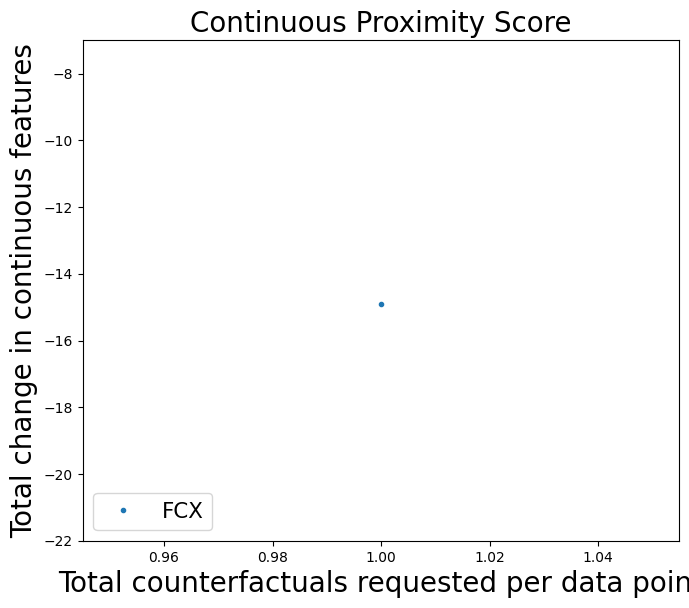

[-14.89528418]
Mean Proximity Score:  -1.8666666666666667
Mean Proximity Score:  -1.9333333333333333
Mean Proximity Score:  -1.8
Mean Proximity Score:  -2.0
Mean Proximity Score:  -1.8666666666666667
Mean Proximity Score:  -1.8666666666666667
Mean Proximity Score:  -2.0
Mean Proximity Score:  -1.8666666666666667
Mean Proximity Score:  -2.066666666666667
Mean Proximity Score:  -2.066666666666667


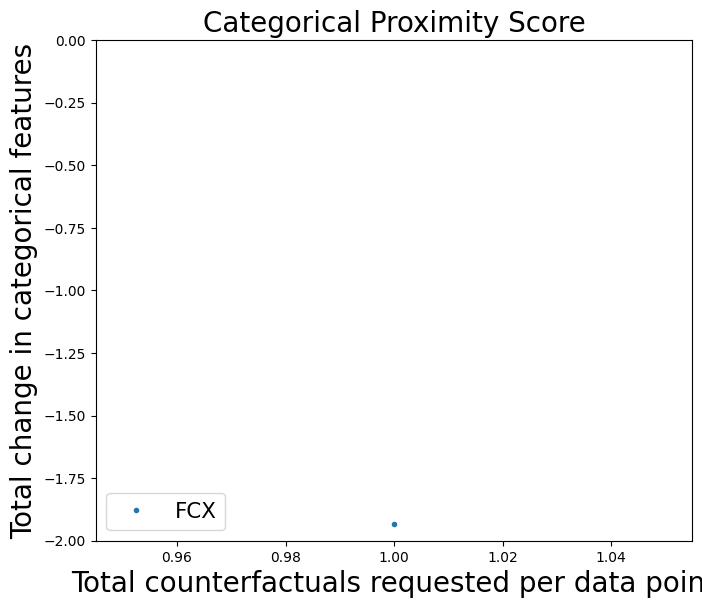

[-1.93333333]
----->> Average lof score 1.0000139474868774
----->> Average lof score 1.0000073909759521
----->> Average lof score 1.0000441074371338
----->> Average lof score 1.0000247955322266
----->> Average lof score 1.0000269412994385
----->> Average lof score 1.0000197887420654
----->> Average lof score 1.0000172853469849
----->> Average lof score 1.0000102519989014
----->> Average lof score 1.0000355243682861
----->> Average lof score 1.000111699104309


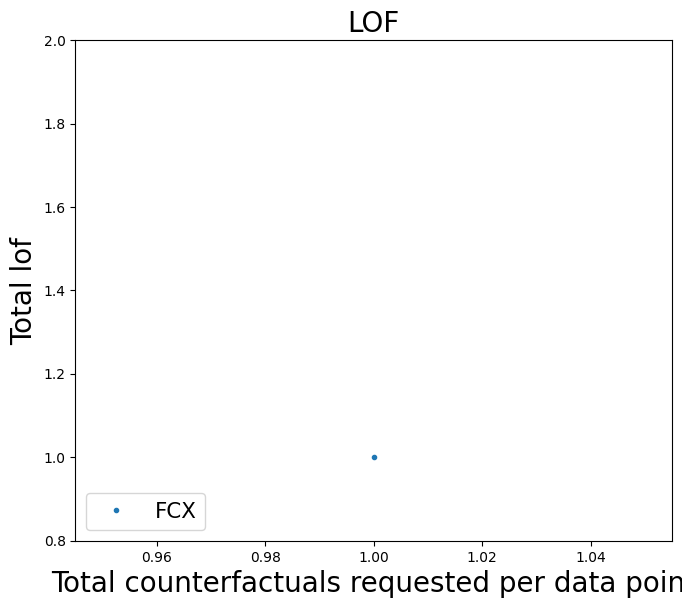

[1.0001117]
{'law': {'validity': {'FCX': [[66.66666666666667], [53.333333333333336], [86.66666666666667], [66.66666666666667], [93.33333333333333], [73.33333333333333], [100.0], [73.33333333333333], [86.66666666666667], [86.66666666666667]]}, 'const-score': {'FCX': [array([72.72727273]), array([75.]), array([69.23076923]), array([77.77777778]), array([70.]), array([69.23076923]), array([66.66666667]), array([81.81818182]), array([66.66666667]), array([90.90909091])]}, 'cont-prox': {'FCX': [[-13.574021356012308], [-13.665302313387006], [-16.160288059321886], [-15.395236476028668], [-16.82225989220189], [-15.094238660304375], [-16.83502327904982], [-13.768177203960668], [-13.928247309977712], [-13.710047201159734]]}, 'cat-prox': {'FCX': [[-1.8666666666666667], [-1.9333333333333333], [-1.8], [-2.0], [-1.8666666666666667], [-1.8666666666666667], [-2.0], [-1.8666666666666667], [-2.066666666666667], [-2.066666666666667]]}, 'LOF': {'FCX': [1.0001117]}}}


In [ ]:

from evaluate_binary_law import evaluate_law
import warnings
warnings.filterwarnings("ignore")
res = evaluate_law(
    base_data_dir='../../data/',
    base_model_dir='../models/',
    dataset_name='law',
    pth_name = 'law-margin-0.344-feasibility-87.0-validity-76.0-epoch-25-fcx-binary.pth'
)
print(res)

Read the results from csv files